In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

## Data quality check / cleaning / preparation 

### Data cleaning
*By Charlie Lovett*

We created our dataset by accumulating data for singular predictors by country from the WHO website. For each of these individual datasets, we removed unnecessary columns and then merged them all together by country. We then exported this merged dataset as 'merged.csv' to use to create our model. For the sake of simplicity, we have not included the code that we used to clean all of our predictors, but the following code offers an example of the cleaning that was done on one dataset (beer as a share of alcohol consumption for each country).

In [20]:
beershare = pd.read_csv("Datasets/beer-as-share-alcohol-consumption.csv")
beershare.head()

,Entity,Code,Year,"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer"
0,Albania,ALB,2016,34.3
1,Algeria,DZA,2016,57.3
2,Andorra,AND,2016,34.1
3,Angola,AGO,2016,70.3
4,Antigua and Barbuda,ATG,2016,33.0


In [21]:
beershare = beershare.rename(columns = {"Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Beer": "beer_as_share_alcohol_consumption", "Entity": "Country"})
beershare = beershare.drop(columns = {"Code","Year"})
beershare.head()

,Country,beer_as_share_alcohol_consumption
0,Albania,34.3
1,Algeria,57.3
2,Andorra,34.1
3,Angola,70.3
4,Antigua and Barbuda,33.0


We had a significant number of predictors that contained at least a few missing values. We imputed each of these missing values by using the average value of the predictor.

In [115]:
train = train.fillna(train.mean())

### Data quality check
*By Lainey Neild*

In [114]:
# Reading and quickly removing unnecessary columns from the merged dataset
train = pd.read_csv('Datasets/merged.csv')
train = train.drop(columns = {'Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Country', 'alc_attributed_fraction_deaths','Region'}, index = 182)
train = train.rename(columns = {'too_many_alc_deaths': 'high_risk'})
train.head()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_both_sexes,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
0,26.5,34.3,37.6,6.74,11878.454102,2882482.0,49.0,25.2,6.74,51.0,...,44.7,23.7,57.4,51.0,37.6,65.0,3.4,1.4,5.5,1
1,24.4,57.3,18.3,0.93,11696.950195,39543148.0,96.8,93.5,0.93,3.2,...,19.3,6.2,23.5,3.2,1.5,4.8,0.7,0.0,1.4,0
2,17.6,70.3,11.3,7.96,8036.411133,28127724.0,52.3,33.9,7.96,47.7,...,81.6,66.8,90.1,47.7,34.3,61.6,2.1,0.7,3.6,1
3,18.3,33.0,45.4,5.89,18594.544922,89958.0,50.6,27.7,5.89,49.4,...,47.2,25.9,60.9,49.4,36.5,63.9,2.7,1.8,3.8,0
4,40.2,39.9,9.6,9.55,23933.886719,43257064.0,32.6,6.7,9.55,67.4,...,32.5,15.2,45.5,67.4,55.7,79.9,2.9,1.2,4.8,0


The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [45]:
# Distribution of all 41 continuous variables in the dataset
train.describe()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_both_sexes,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
count,172.000000,172.000000,172.000000,176.000000,176.000000,1.760000e+02,175.000000,181.000000,182.000000,174.000000,...,161.000000,161.000000,161.000000,160.000000,160.000000,160.000000,161.000000,161.000000,161.000000,183.000000
mean,15.976163,44.012791,28.788953,6.147551,19310.667153,4.119821e+07,60.602857,44.183978,6.044143,39.445402,...,41.386957,21.839752,51.893789,39.180625,29.308750,49.277500,2.301863,0.903106,3.780124,0.284153
std,17.464502,22.156349,23.657400,4.199294,20029.814706,1.491975e+08,23.334798,28.284171,4.194188,23.393383,...,15.211181,12.454734,17.808950,23.674946,21.790539,26.230174,1.744042,0.800033,2.993510,0.452247
min,0.000000,2.300000,0.000000,0.003000,825.205688,8.995800e+04,8.200000,3.400000,0.003000,0.100000,...,1.900000,0.500000,2.300000,0.100000,0.100000,0.200000,0.100000,0.000000,0.200000,0.000000
25%,2.100000,29.275000,10.500000,2.190000,4382.449463,2.299560e+06,40.800000,17.900000,2.152500,21.900000,...,35.000000,15.500000,45.500000,21.825000,12.750000,31.000000,0.700000,0.200000,1.400000,0.000000
50%,8.400000,40.400000,23.850000,5.910000,11934.864258,8.799540e+06,63.600000,41.600000,5.825000,36.400000,...,42.500000,20.800000,54.300000,35.050000,22.950000,48.150000,2.500000,0.700000,3.900000,0.000000
75%,27.925000,57.450000,42.150000,9.580000,27912.890625,2.933118e+07,78.100000,66.400000,9.550000,59.450000,...,48.700000,25.800000,60.900000,59.775000,46.850000,72.825000,3.000000,1.400000,5.100000,1.000000
max,80.200000,100.000000,97.300000,18.350000,113182.726562,1.393715e+09,99.900000,99.500000,18.350000,91.800000,...,88.100000,79.100000,94.300000,91.800000,87.700000,95.800000,11.000000,3.800000,19.600000,1.000000


In [46]:
# Distribution of regions in the dataset
train.Region.value_counts()

Europe                   45
Africa                   43
Americas                 30
Eastern Mediterranean    19
Western Pacific          16
South-East Asia           9
Name: Region, dtype: int64

<AxesSubplot:xlabel='high_risk', ylabel='count'>

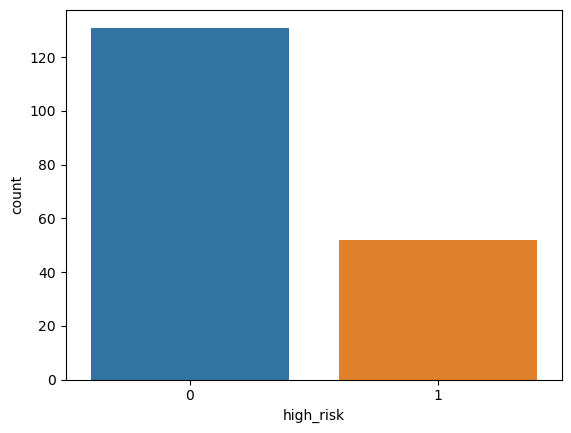

In [47]:
# Visualize the distribution of observations that do / don't classify as high risk for alcohol related mortality
sns.countplot(data=train, x='high_risk')

### Data preparation
*By Jack Troxel*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. We first created our response variable artificially. We did this by classifying observations with alcohol attributable mortality rates greater than 6% as high risk. This value was determined based on information from the WHO website.

2. We shuffled our dataset to prepare for K-fold cross validation. Since we have population data in this case, K-fold CV will help us to analyze whether the model that we generate is better than a naive model that uses all of the predictors.

In [3]:
# Creating our response variable
train['high_risk'] = train['alc_attributed_fraction_deaths'].apply(lambda x: 1 if x>6 else 0)

In [116]:
# Shuffling the dataset for K-fold CV
train = train.sample(frac=1)
train.head()

,wine_as_share_alcohol_consumption,beer_as_share_alcohol_consumption,spirits_as_share_alcohol_consumption,tot_alcohol_consumption_per_capita_liters,gdp_per_capita,Population,percent_who_have_not_drank_alcohol_in_last_year,perc_life_no_drink,total_alcohol_consumption_per_capita_liters,percent_who_have_drank_alcohol_in_last_year,...,perc_heavy_drinkers_both_sexes,perc_heavy_drinkers_female,perc_heavy_drinkers_male,perc_consume_alc_past12,perc_consume_alc_past12Female,perc_consume_alc_past12Male,perc_dependent,perc_dependent_female,perc_dependent_male,high_risk
107,10.400000,60.200000,13.900000,5.23,10662.830078,2282709.0,69.700000,54.3,5.23,30.300000,...,59.7,35.5,71.6,30.3,19.1,42.4,2.2,0.8,3.7,1
178,15.976163,44.012791,28.788953,0.29,4278.346680,210969296.0,98.800000,96.5,0.29,1.200000,...,5.3,1.5,6.5,1.2,0.6,1.8,0.2,0.1,0.3,0
119,2.700000,95.200000,2.100000,1.39,4083.752441,8682172.0,86.300000,67.6,1.39,13.700000,...,60.7,34.0,70.2,13.7,7.3,19.9,2.9,0.7,5.1,0
87,15.400000,33.900000,49.200000,1.65,16358.375977,6398941.0,93.900000,90.1,1.65,6.100000,...,20.2,6.8,24.5,6.1,3.0,9.2,3.7,0.0,7.4,0
140,2.900000,93.300000,3.300000,1.55,2518.647461,612670.0,60.602857,97.1,1.55,39.445402,...,60.3,34.4,69.9,0.7,0.3,1.1,2.9,0.7,5.1,0


## Exploratory data analysis
*By Charlie Lovett and Jack Troxel*

In [73]:
# Examine which predictors are most strongly correlated with the response variable
train.corrwith(train.high_risk).sort_values(ascending = False)

high_risk                                          1.000000
tot_alcohol_consumption_per_capita_liters          0.447922
daly_alc_use_disorders__all_ages_standardized      0.402697
daly_alc_use_disorders_15_49                       0.399031
perc_heavy_drinkers_male                           0.398390
perc_heavy_drinkers_both_sexes                     0.392347
share_alc_use_disorders_both_sexes                 0.382273
prev_alc_use_disorders_age_70                      0.377033
perc_dependent_male                                0.358100
prev_alc_use_disorders_all_ages                    0.341563
perc_dependent                                     0.336831
prev_alc_use_disorders_age_30_34                   0.315213
prev_alc_use_disorders_age_standardized            0.308772
daly_alc_use_disorders_70                          0.298798
prev_alc_use_disorders_age_15_49                   0.288511
perc_consume_alc_past12Male                        0.252372
prev_alc_use_disorders_age_25_29        

Text(0.5, 0, 'prev_alc_use_disorders_age_50_69')

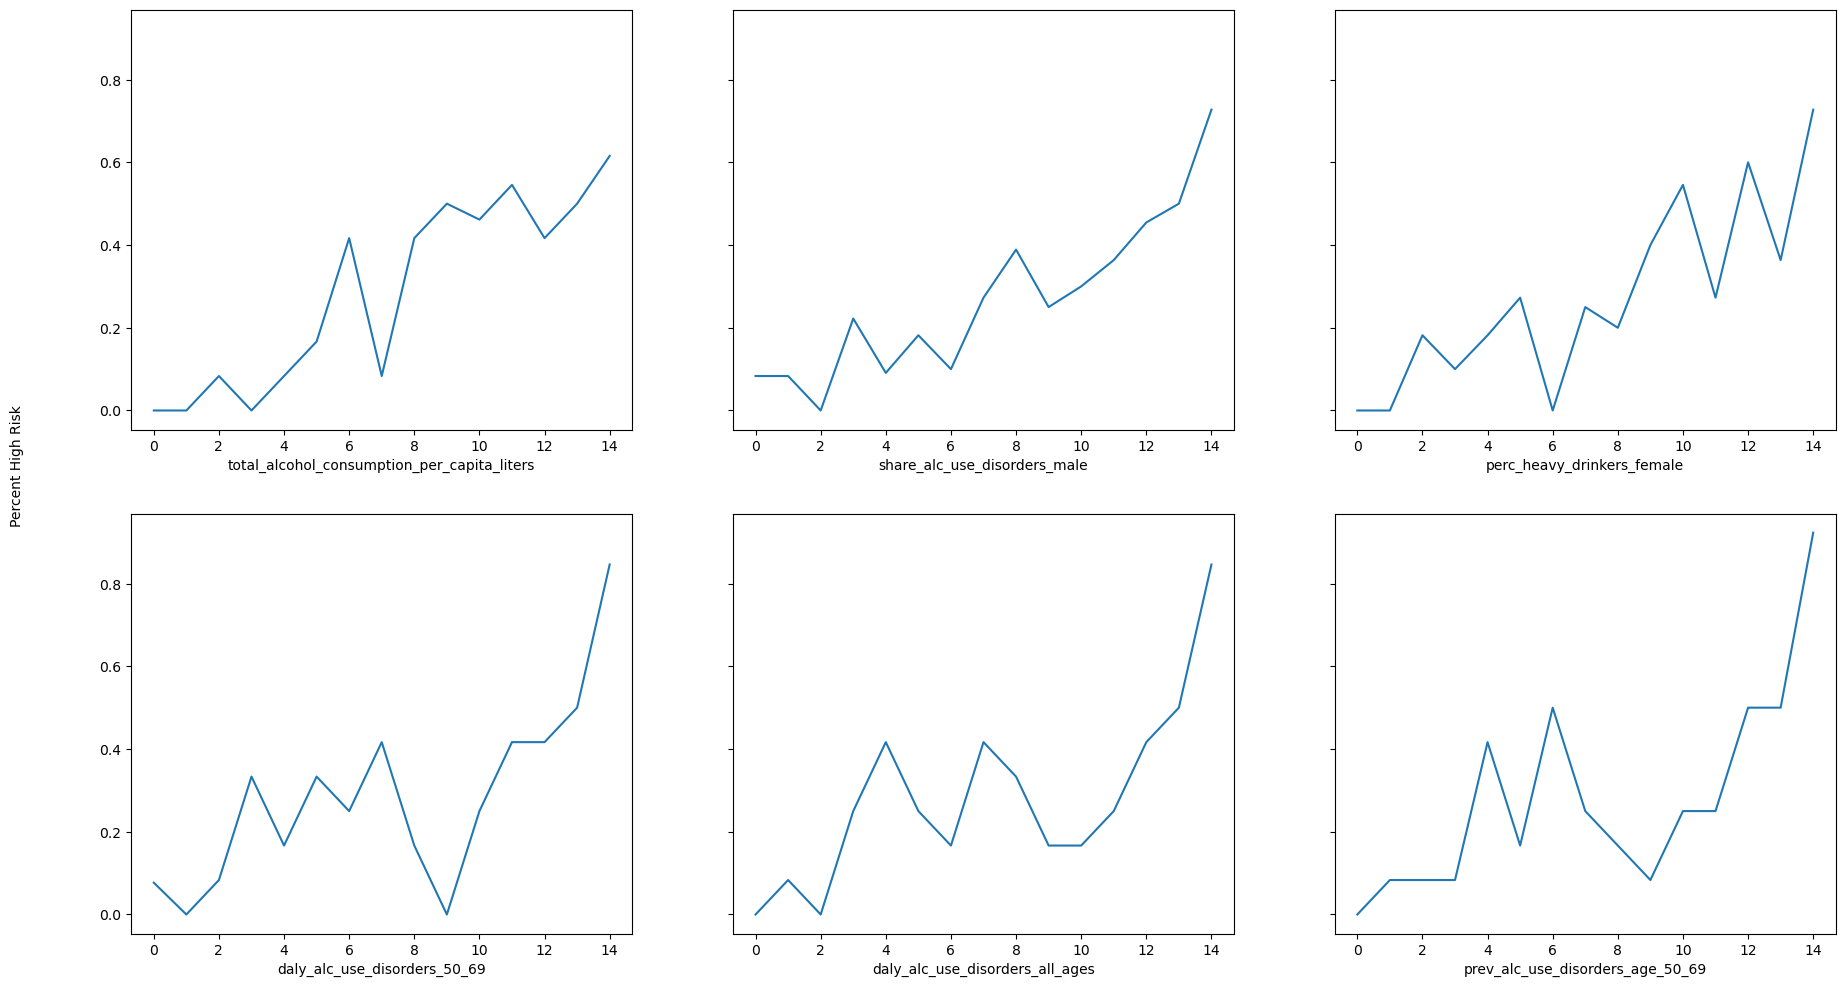

In [68]:
# For the 6 most correlated predictors, examine the relationship between a binned version of each
# of these variables and the response variable to determine any possible transformations

fig, axes = plt.subplots(2,3,figsize=(22,12),sharey=True)
fig.text(0.07, 0.5, 'Percent High Risk', va='center', rotation='vertical')

#1
binned1 = pd.qcut(train['total_alcohol_consumption_per_capita_liters'],15,retbins=True)
train['total_alcohol_consumption_per_capita_liters'] = binned1[0]
new_data = train.groupby('total_alcohol_consumption_per_capita_liters')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,0], x=new_data.index, y= new_data['hi_percent'])
axes[0,0].set_xlabel('total_alcohol_consumption_per_capita_liters')
axes[0,0].set_ylabel('')


#2
binned2 = pd.qcut(train['share_alc_use_disorders_male'],15,retbins=True)
train['share_alc_use_disorders_male'] = binned2[0]
new_data = train.groupby('share_alc_use_disorders_male')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,1], x=new_data.index, y= new_data['hi_percent'])
axes[0,1].set_xlabel('share_alc_use_disorders_male')

#3
binned3 = pd.qcut(train['perc_heavy_drinkers_female'],15,retbins=True)
train['perc_heavy_drinkers_female'] = binned3[0]
new_data = train.groupby('perc_heavy_drinkers_female')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[0,2], x=new_data.index, y= new_data['hi_percent'])
axes[0,2].set_xlabel('perc_heavy_drinkers_female')

#4
binned4 = pd.qcut(train['daly_alc_use_disorders_50_69'],15,retbins=True)
train['daly_alc_use_disorders_50_69'] = binned4[0]
new_data = train.groupby('daly_alc_use_disorders_50_69')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,0], x=new_data.index, y= new_data['hi_percent'])
axes[1,0].set_xlabel('daly_alc_use_disorders_50_69')
axes[1,0].set_ylabel('')

#5
binned5 = pd.qcut(train['daly_alc_use_disorders_all_ages'],15,retbins=True)
train['daly_alc_use_disorders_all_ages'] = binned5[0]
new_data = train.groupby('daly_alc_use_disorders_all_ages')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,1], x=new_data.index, y= new_data['hi_percent'])
axes[1,1].set_xlabel('daly_alc_use_disorders_all_ages')

#6
binned6 = pd.qcut(train['prev_alc_use_disorders_age_50_69'],15,retbins=True)
train['prev_alc_use_disorders_age_50_69'] = binned6[0]
new_data = train.groupby('prev_alc_use_disorders_age_50_69')['high_risk'].agg([('hi_percent','mean'),('nobs','count')]).reset_index(drop=False)
ax = sns.lineplot(ax=axes[1,2], x=new_data.index, y= new_data['hi_percent'])
axes[1,2].set_xlabel('prev_alc_use_disorders_age_50_69')

## Developing the model
*By Jacob Muriel*

#### Naive Model (model using all predictors)

In [118]:
columns = train.columns.to_list()
columns.remove('high_risk')
columns

['wine_as_share_alcohol_consumption',
 'beer_as_share_alcohol_consumption',
 'spirits_as_share_alcohol_consumption',
 'tot_alcohol_consumption_per_capita_liters',
 'gdp_per_capita',
 'Population',
 'percent_who_have_not_drank_alcohol_in_last_year',
 'perc_life_no_drink',
 'total_alcohol_consumption_per_capita_liters',
 'percent_who_have_drank_alcohol_in_last_year',
 'prev_alc_use_disorders_age_10_14',
 'prev_alc_use_disorders_age_15_19',
 'prev_alc_use_disorders_all_ages',
 'prev_alc_use_disorders_age_25_29',
 'prev_alc_use_disorders_age_30_34',
 'prev_alc_use_disorders_age_20_24',
 'prev_alc_use_disorders_age_70',
 'prev_alc_use_disorders_age_15_49',
 'prev_alc_use_disorders_age_5_14',
 'prev_alc_use_disorders_age_50_69',
 'prev_alc_use_disorders_age_standardized',
 'daly_alc_use_disorders_all_ages',
 'daly_alc_use_disorders_70',
 'daly_alc_use_disorders_5_14',
 'daly_alc_use_disorders_15_49',
 'daly_alc_use_disorders__all_ages_standardized',
 'daly_alc_use_disorders_50_69',
 'share_a

In [120]:
naive_model = sm.logit(formula = 'high_risk~'+ '+'.join([str(x) for x in columns]), data = train).fit()



         Current function value: 0.135756
         Iterations: 35


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_risk   No. Observations:                  182
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                           39
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.7731
Time:                        15:46:24   Log-Likelihood:                -24.708
converged:                      False   LL-Null:                       -108.89
Covariance Type:            nonrobust   LLR p-value:                 5.265e-18
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                         120.5582    241.786      0.499      0.618    -353.334     594.451
wine_as_share_alcohol_consumption                   0.0916      0.045      2.047      0.041       0.004       0.179
beer_as_share_alcohol_consumption                   0.1299      0.054      2.392      0.017       0.023       0.236
spirits_as_share_alcohol_consumption                0.0889      0.049      1.824      0.068      -0.007       0.184
tot_alcohol_consumption_per_capita_liters         -28.5597   1.33e+04     -0.002      0.998   -2.61e+04     2.6e+04
gdp_per_capita                                     -0.0004      0.000     -2.658      0.008      -0.001      -0.000
Population                                      -2.161e-09   3.96e-09     -0.546      0.585   -9.92e-09     5.6e-09
percent_who_have_not_drank_alcohol_in_last_year    -0.9612      2.402     -0.400      0.689      -5.670       3.747
perc_life_no_drink                                 -0.3663      0.134     -2.742      0.006      -0.628      -0.104
total_alcohol_consumption_per_capita_liters        30.4698   1.33e+04      0.002      0.998    -2.6e+04    2.61e+04
percent_who_have_drank_alcohol_in_last_year        -1.1445      2.417     -0.473      0.636      -5.882       3.593
prev_alc_use_disorders_age_10_14                   -4.6105    162.804     -0.028      0.977    -323.700     314.479
prev_alc_use_disorders_age_15_19                    3.0520     42.489      0.072      0.943     -80.225      86.329
prev_alc_use_disorders_all_ages                   -12.4696     13.544     -0.921      0.357     -39.015      14.076
prev_alc_use_disorders_age_25_29                   65.2126     41.366      1.576      0.115     -15.862     146.288
prev_alc_use_disorders_age_30_34                  -42.6556     30.355     -1.405      0.160    -102.150      16.839
prev_alc_use_disorders_age_20_24                  -49.6001     37.045     -1.339      0.181    -122.207      23.007
prev_alc_use_disorders_age_70                       8.2182      4.773      1.722      0.085      -1.136      17.572
prev_alc_use_disorders_age_15_49                   58.2646     27.453      2.122      0.034       4.459     112.071
prev_alc_use_disorders_age_5_14                   317.7443    236.796      1.342      0.180    -146.368     781.856
prev_alc_use_disorders_age_50_69                    5.9864      8.509      0.704      0.482     -10.691      22.664
prev_alc_use_disorders_age_standardized           -50.9716     41.516     -1.228      0.220    -132.342      30.398
daly_alc_use_disorders_all_ages                     0.0215      0.070      0.306      0.760      -0.116       0.159
daly_alc_use_disorders_70                          -0.0445      0.024     -1.873      0.061      -0.091       0.002
daly_alc_use_disorders_5_14                        -2.2351      4.317     -0.518      0.605     -10.696      

#### Model Based Solely off EDA

#### Creation of the Final Model

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.